In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk

from wordcloud import WordCloud, STOPWORDS
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
from sklearn import svm

from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def cleanup(df):
  # make lower case.
  df["Comment"] = df["Comment"].str.lower()
  # remove links. Replaces all the http strings with an empty string.
  df['Comment'] = df['Comment'].str.replace('http\S+|www.\S+', '', case=False)
  # remove some of the tags.
  df['Comment'] = df['Comment'].str.replace(r'\\\\',r'\\')
  df['Comment'] = df['Comment'].str.replace(r'"|\\n|\\xa0|\\u0111|\\u01b0|\\u1|\\xe1c|<.*?>|\\xe3|\\xc2|xe2|x80','')

def printScore(predictions,real):
  score1 = metrics.f1_score(real, predictions, average='macro' )
  print('F1 score : ',score1)
  score2 = accuracy_score(real, predictions)
  print('Classification score : ',score2)
  return [score1,score2]

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

def removeStopWords(text):
  text_tokens = word_tokenize(text)
  return " ".join([word for word in text_tokens if not word in stopwords.words()])

#function for plotting workclouds
def plotWordCloud(wordcloud): # also used in previous assigment
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

def wordCloudGen(df,stop_words): # also used in previous assigment 
  _stop_words_ = stop_words + list(STOPWORDS)
  return WordCloud(width = 1920, height = 1080,collocations=False, background_color ='white', 
                        stopwords = _stop_words_, min_font_size = 30).generate(' '.join(df).lower())

def POSFreq(x,t): # return the frequencies of nouns verbs etc.
  tokenized = word_tokenize(x)
  tags = nltk.pos_tag(tokenized)
  counts = Counter(tag for word , tag in tags)
  sum = len(tokenized)
  if(sum > 0 and t in counts):
    return counts[t] / (float)(sum)
  else:
    return 0

In [ ]:
# open files.
train = pd.read_csv("./train.csv")
testX = pd.read_csv("./impermium_verification_set.csv")
testY = pd.read_csv("./impermium_verification_labels.csv")

# clear collumns.
trainX = train[['Comment']];
trainY = train[['Insult']];
testX = testX[['Comment']];
testY = testY[['Insult']];

cleanup(trainX);
cleanup(testX);

**NaiveBayes without any special improvements.**

In [ ]:
naive_countVec = CountVectorizer()
trainX_bow = naive_countVec.fit_transform(trainX['Comment'])
testX_bow = naive_countVec.transform(testX['Comment'])

clf_bayes = MultinomialNB(alpha = 0) 
clf_bayes.fit(trainX_bow.toarray(), trainY)
predictions = clf_bayes.predict(testX_bow.toarray())
s1_1 , s2_1 = printScore(predictions,testY)

F1 score :  0.5727967001593123
Classification score :  0.5762863534675615


**With lemmatization**

In [ ]:
trainX_lem = trainX['Comment'].apply(lemmatize_text)
testX_lem = testX['Comment'].apply(lemmatize_text)

naive_countVec = CountVectorizer()
trainX_bow = naive_countVec.fit_transform(trainX_lem)
testX_bow = naive_countVec.transform(testX_lem)

clf_bayes = MultinomialNB(alpha = 0) 
clf_bayes.fit(trainX_bow.toarray(), trainY)
predictions = clf_bayes.predict(testX_bow.toarray())
s1_2 , s2_2 = printScore(predictions,testY)

F1 score :  0.577995642701525
Classification score :  0.5812080536912752


**With stopwords**

Using a word cloud to see which words have to be put in the stop words list.

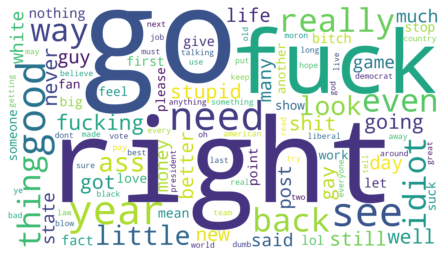

F1 score :  0.6222684807908876
Classification score :  0.6384787472035794


In [ ]:
stop_words = set(stopwords.words())
stop_words.update(['people','know','one','now','time','make','say','will','want','us','think','comment','obama'])
plotWordCloud(wordCloudGen(trainX['Comment'],list(stop_words)))

#_stop_words_ = set(stopwords.words()) Gives worse result so we stick with the english stop words.
naive_countVec = CountVectorizer(stop_words = list(stop_words))
trainX_bow = naive_countVec.fit_transform(trainX['Comment'])
testX_bow = naive_countVec.transform(testX['Comment'])

clf_bayes = MultinomialNB(alpha = 0) 
clf_bayes.fit(trainX_bow.toarray(), trainY)
predictions = clf_bayes.predict(testX_bow.toarray())
s1_3 , s2_3 = printScore(predictions,testY)

**With bigrams**

In [ ]:
naive_countVec = CountVectorizer(ngram_range=(1,2))
trainX_bow = naive_countVec.fit_transform(trainX['Comment'])
testX_bow = naive_countVec.transform(testX['Comment'])

clf_bayes = MultinomialNB(alpha = 0) 
clf_bayes.fit(trainX_bow.toarray(), trainY)
predictions = clf_bayes.predict(testX_bow.toarray())
s1_4 , s2_4 = printScore(predictions,testY)

F1 score :  0.569033796392287
Classification score :  0.5838926174496645


**With laplace smoothing**

Based on the sklearn documentation 
"alpha parameter : Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing)."

In [ ]:
naive_countVec = CountVectorizer()
trainX_bow = naive_countVec.fit_transform(trainX['Comment'])
testX_bow = naive_countVec.transform(testX['Comment'])

clf_bayes = MultinomialNB(alpha = 1.0)
clf_bayes.fit(trainX_bow.toarray(), trainY)
predictions = clf_bayes.predict(testX_bow.toarray())
s1_5 , s2_5 = printScore(predictions,testY)

F1 score :  0.676551424999362
Classification score :  0.6827740492170022


**Observations**

Due to the nature of internet , forum posts have the following characteristics :
*   The informal mood creates more grammar and spelling mistakes 
*   Slang words are way more frequent
*   Words may be written wrong on purpose to avoid automatic ban systems

Taking the above in consideration may explain why some "isolated" methods dont produce the expected outcome.

Heated discusions are often more "rushy" so the normalization of "words" may remove from the tone of the conversation. Lemmatization may not be as efficient if we have words with repeated characters. eg heeeeeeeelllo?? is not an appropriate english word but makes sense in the context of an online forum.
This also affects bigrams since two simillar tuples may not appear as such.

Stopwords increase the accuracy. Words that do no alter the tone or meaning of a comment are removed giving more *weight* to words that have more contexual "power". 

It's very likely that methods that produced worse results on their own may give better ones in combination with others. eg bigrams with lemmatization

In [ ]:
data = [['default',s1_1, s2_1], ['lemmatization',s1_2, s2_2],['stopwords',s1_3,s2_3],['bigrams',s1_4,s2_4],['Laplace',s1_5,s2_5]]
pd.DataFrame(data, columns=["Method","F1", "CLF score"])

,Method,F1,CLF score
0,default,0.572797,0.576286
1,lemmatization,0.577996,0.581208
2,stopwords,0.622268,0.638479
3,bigrams,0.569034,0.583893
4,Laplace,0.676551,0.682774


**POS tagging and TFIDF**

In [ ]:
#rb nn vb jj
trainX_extended = trainX.copy()
trainX_extended['RB'] = trainX_extended['Comment'].apply(lambda x : POSFreq(x,'RB'))
trainX_extended['NN'] = trainX_extended['Comment'].apply(lambda x : POSFreq(x,'NN'))
trainX_extended['VB'] = trainX_extended['Comment'].apply(lambda x : POSFreq(x,'VB'))
trainX_extended['JJ'] = trainX_extended['Comment'].apply(lambda x : POSFreq(x,'JJ'))

testX_extended = testX.copy()
testX_extended['RB'] = testX_extended['Comment'].apply(lambda x : POSFreq(x,'RB'))
testX_extended['NN'] = testX_extended['Comment'].apply(lambda x : POSFreq(x,'NN'))
testX_extended['VB'] = testX_extended['Comment'].apply(lambda x : POSFreq(x,'VB'))
testX_extended['JJ'] = testX_extended['Comment'].apply(lambda x : POSFreq(x,'JJ'))

In [ ]:
vectorizer = TfidfVectorizer() 
trainX_tf = vectorizer.fit_transform(trainX['Comment']) 
testX_tf = vectorizer.transform(testX['Comment'])

# concatinating the columns from the tfidf values and the POS tags. 
resTrainX = pd.concat([trainX_extended[['RB','NN','VB','JJ']], pd.DataFrame(trainX_tf.toarray(), columns=vectorizer.get_feature_names())], axis=1)
resTestX = pd.concat([testX_extended[['RB','NN','VB','JJ']], pd.DataFrame(testX_tf.toarray(), columns=vectorizer.get_feature_names())], axis=1)

**SVM**

In [ ]:
clf_svm = svm.SVC()
clf_svm.fit(resTrainX, trainY)
predictions = clf_svm.predict(resTestX)
s1 , s2 = printScore(predictions,testY)

F1 score :  0.6550280453272654
Classification score :  0.6841163310961969


**RANDOM FORESTS**

In [ ]:
clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(resTrainX, trainY)
predictions = clf_forest.predict(resTestX)
f1 , f2 = printScore(predictions,testY)

F1 score :  0.5720357862773997
Classification score :  0.629082774049217


The initial accuracy is increased.Compared to the bayes clfs the difference isn't that big. The part of speech tags dont seem to impact the overall accuracy by a lot since they are only 4 features. NLTK provides many categories so words may often fall into labels other than the predefined RB NN FB JJ ones. That being said there is an increase. A possible explanation is that negative comments contain higher frequencies of some of the POS labels. eg cursing contains more adjectives.

SVM seems to overpass the random forest clasifier. This is to be expected since svm is better suited for binary clasification problems.

It should be noted that the training data are double the testing data so they might not suffice for training.

Overall the svm and multinomial bayes clasifier with laplace smoothing seem to be perfoming on a similar level giving the best results so far.

In [ ]:
data = [['default',s1_1, s2_1], ['SVM',s1, s2],['Forests',f1,f2]]
pd.DataFrame(data, columns=["Method","F1", "CLF score"])

,Method,F1,CLF score
0,default,0.572797,0.576286
1,SVM,0.655028,0.684116
2,Forests,0.572036,0.629083


**Possible improvements on F1 metric** (best from prior tests : 67.6 %)

In [ ]:
#rb nn vb jj
trainX_extended = trainX.copy()
trainX_extended['RB'] = trainX_extended['Comment'].apply(lambda x : POSFreq(x,'RB'))
trainX_extended['NN'] = trainX_extended['Comment'].apply(lambda x : POSFreq(x,'NN'))
trainX_extended['VB'] = trainX_extended['Comment'].apply(lambda x : POSFreq(x,'VB'))
trainX_extended['JJ'] = trainX_extended['Comment'].apply(lambda x : POSFreq(x,'JJ'))

testX_extended = testX.copy()
testX_extended['RB'] = testX_extended['Comment'].apply(lambda x : POSFreq(x,'RB'))
testX_extended['NN'] = testX_extended['Comment'].apply(lambda x : POSFreq(x,'NN'))
testX_extended['VB'] = testX_extended['Comment'].apply(lambda x : POSFreq(x,'VB') + POSFreq(x,'VBD') + POSFreq(x,'VBG') + POSFreq(x,'VBN') + POSFreq(x,'VBP') + POSFreq(x,'VBZ'))
testX_extended['JJ'] = testX_extended['Comment'].apply(lambda x : POSFreq(x,'JJ') + POSFreq(x,'JJR') + POSFreq(x,'JJS'))

vectorizer = TfidfVectorizer(max_features = 2500) 
trainX_tf = vectorizer.fit_transform(trainX_extended['Comment']) 
testX_tf = vectorizer.transform(testX_extended['Comment'])

# concatinating the columns from the tfidf values and the POS tags. 
resTrainX = pd.concat([trainX_extended[['RB','NN','VB','JJ']], pd.DataFrame(trainX_tf.toarray(), columns=vectorizer.get_feature_names())], axis=1)
resTestX = pd.concat([testX_extended[['RB','NN','VB','JJ']], pd.DataFrame(testX_tf.toarray(), columns=vectorizer.get_feature_names())], axis=1)

clf_svm = svm.SVC(C=10)
clf_svm.fit(resTrainX, trainY)
predictions = clf_svm.predict(resTestX)
s1 , s2 = printScore(predictions,testY)

F1 score :  0.7053516252626375
Classification score :  0.7136465324384788


By increasing the *C* factor of the svm clf , limiting the tfidf features to 2500 and adding some similar POS tag frequencies to the previously set groups we were able to get an F1 score of ~70 %

Notes :
lemmatization and stopwords gave an accuracy worse than 70 % on the last configuration so they were not included.

Possible improvements :

A better cleanup stragety. Some tags were not properly removed. Removing "emojis" and letter repetition will further normalize the data possibly producing better results with the above methods.
